In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Loading the Data set from a csv file to a pandas data frame

Source for hawks.csv: https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/Stat2Data/Hawks.csv

In [2]:
#load hawks data set 
hawks = pd.read_csv('hawks.csv')

Important key information on the data set features:

Species - CH:Cooper's Hawk, SS:Sharp-shinned Hawk, RT:Redtail Hawk

Age - A:Adult, I:Immature

Wing - length of the primary wing feather in mm

Weight - Body weight in g

Culmen - Length along the top of the bill from tip to face in mm

Hallux - Length in mm of the killing talon

Tail - Aggregate measurement related to the length of the tail in mm

In [3]:
# Summary statistics using .describe()
hawks.describe(include='all')

,rownames,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
count,908.00000,908.000000,908.000000,908.000000,908,907,908,908,908,332,907.000000,898.000000,901.000000,902.000000,908.000000,571.000000,75.000000,77.000000,567.000000,565.000000
unique,NaN,NaN,NaN,NaN,308,59,907,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,13:30,,,RT,I,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,14,842,2,577,684,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,454.50000,9.842511,15.740088,1998.253304,NaN,NaN,NaN,NaN,NaN,NaN,315.637486,772.080178,21.801498,26.410865,198.831498,199.182137,71.950667,0.792208,2.184303,0.234540
std,262.26132,0.685717,8.413164,3.454180,NaN,NaN,NaN,NaN,NaN,NaN,95.277591,462.311760,7.284175,17.734704,36.824403,38.197755,17.263204,0.878660,1.044073,0.461597
min,1.00000,8.000000,1.000000,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.200000,56.000000,8.600000,9.500000,119.000000,115.000000,24.700000,0.000000,0.000000,0.000000
25%,227.75000,9.000000,9.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,NaN,202.000000,185.000000,12.800000,15.100000,160.000000,162.000000,55.600000,0.000000,2.000000,0.000000
50%,454.50000,10.000000,16.000000,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,370.000000,970.000000,25.500000,29.400000,214.000000,215.000000,79.300000,1.000000,2.000000,0.000000
75%,681.25000,10.000000,23.000000,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,390.000000,1120.000000,27.300000,31.400000,225.000000,226.000000,87.000000,1.000000,3.000000,0.250000


Data mining 

In [4]:
drop_columns = ['Month', 'Day', 'Year', 'CaptureTime', 'ReleaseTime', 'BandNumber', 'StandardTail', 'Tarsus', 'WingPitFat', 'KeelFat', 'Crop', 'Sex', 'Age' ]
hawks = hawks.drop(drop_columns, axis=1)

In [5]:
#removing any missing values
hawks = hawks.dropna()

Data visualization

Text(0.5, 1.0, 'Wing vs. weight for all hawks')

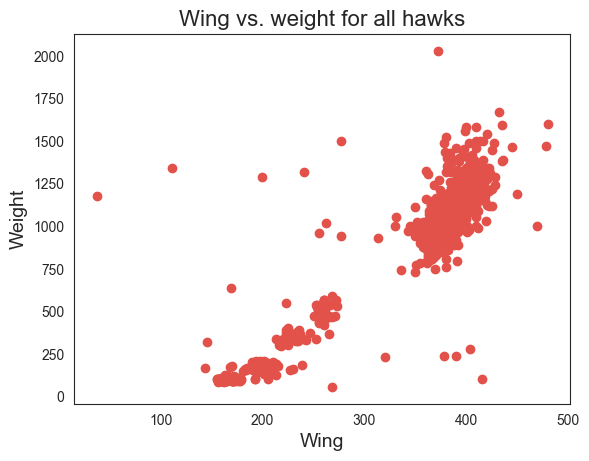

In [7]:
sns.set_palette("Spectral")
sns.set_style("white")

x = hawks['Wing']
y = hawks['Weight']

plt.scatter(x, y)
plt.xlabel('Wing', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.title('Wing vs. weight for all hawks', fontsize=16)

Text(0.5, 1.0, 'Wing vs. weight by species')

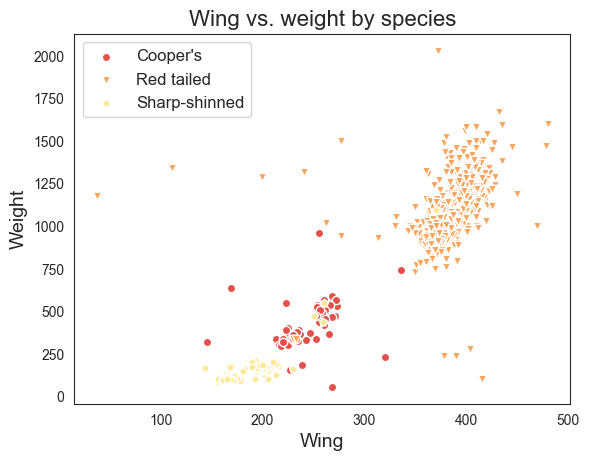

In [9]:
CoopersHawk = hawks[hawks['Species'] == 'CH']
RedTailed = hawks[hawks['Species'] == 'RT']
SharpShinned = hawks[hawks['Species'] == 'SS']

x1 = CoopersHawk['Wing']
y1 = CoopersHawk['Weight']

x2 = RedTailed['Wing']
y2 = RedTailed['Weight']

x3 = SharpShinned['Wing']
y3 = SharpShinned['Weight']

plt.scatter(x1, y1, label="Cooper's", edgecolors='white', marker='o')
plt.scatter(x2, y2, label='Red tailed', edgecolors='white', marker='v')
plt.scatter(x3, y3, label='Sharp-shinned', edgecolors='white', marker='p')
plt.legend(fontsize=12)
plt.xlabel('Wing', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.title('Wing vs. weight by species', fontsize=16)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


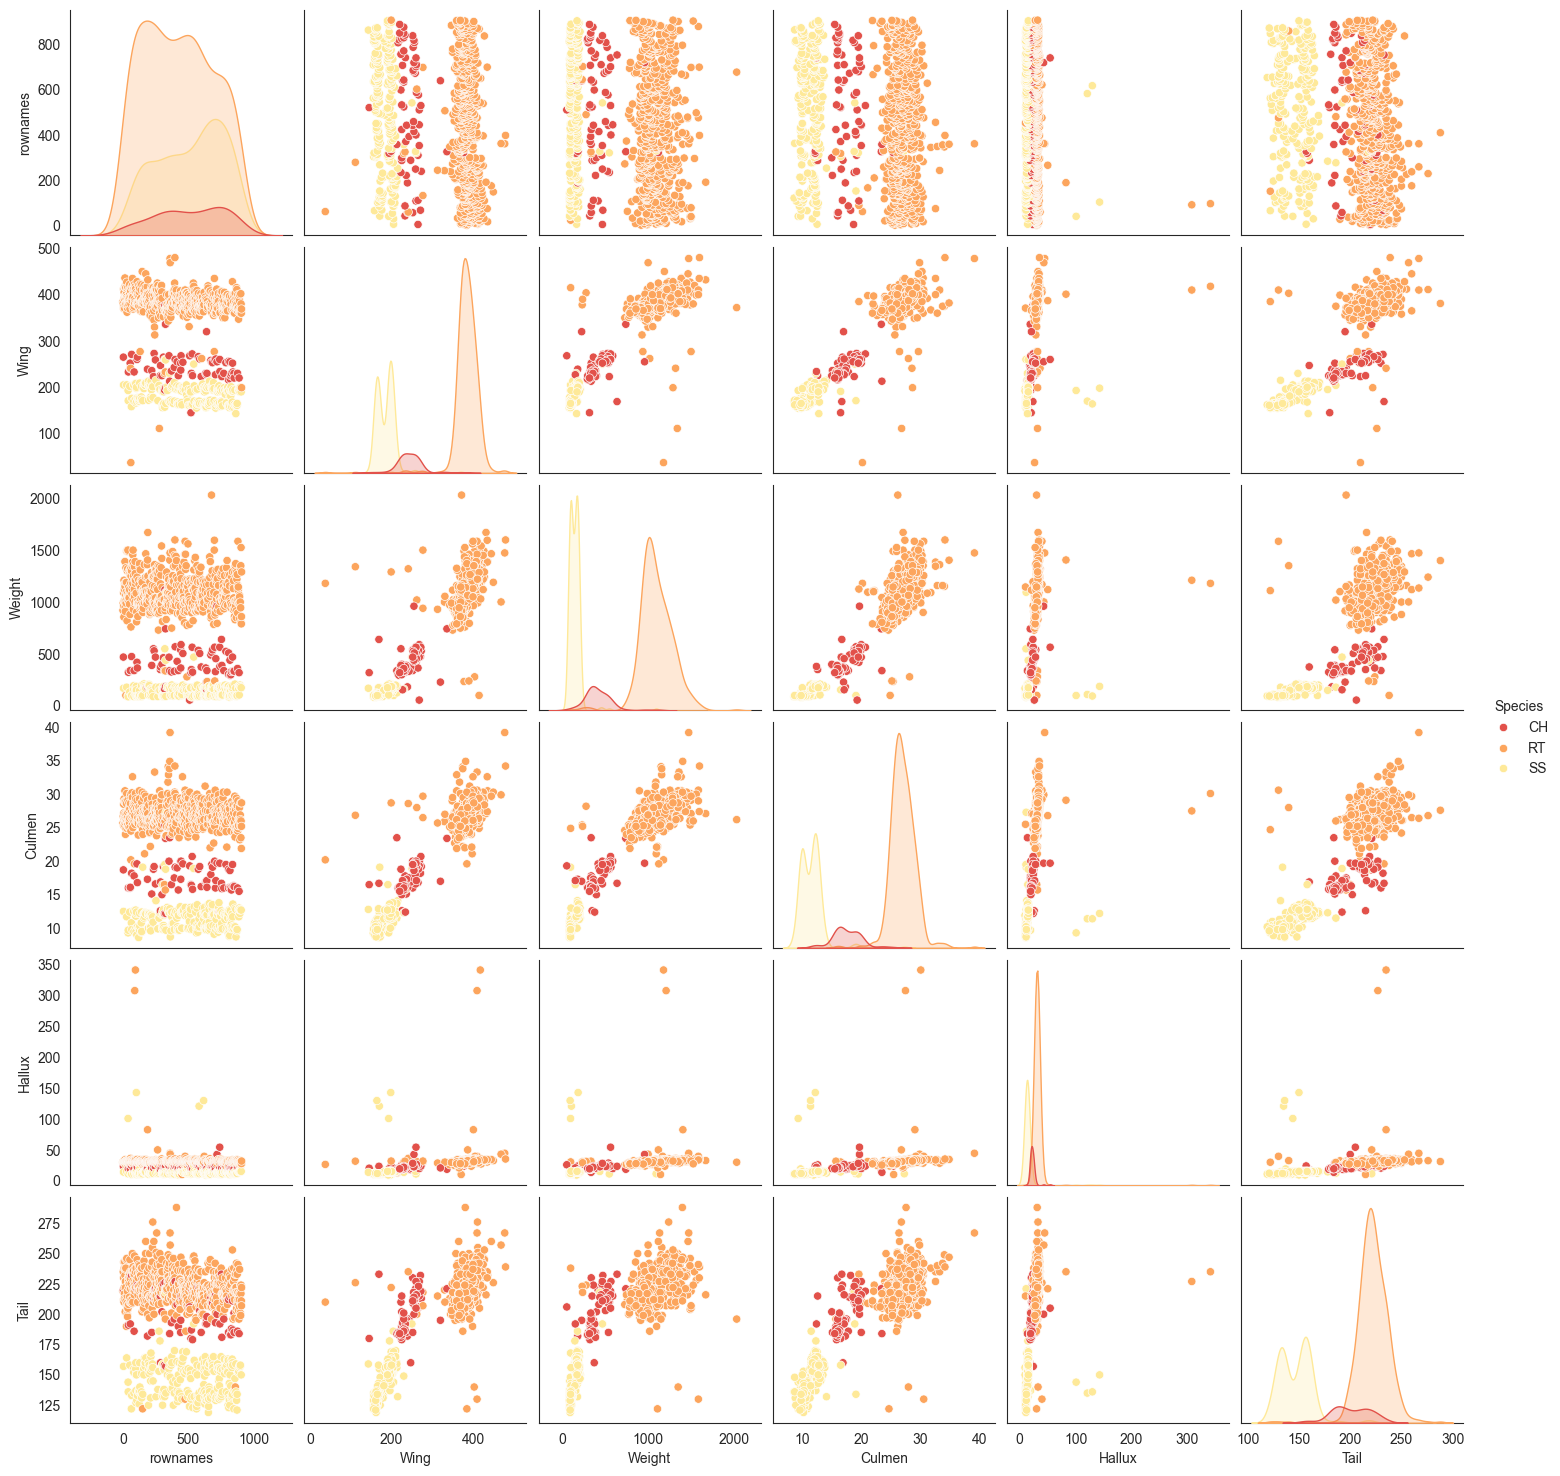

In [32]:
#viewing and converting Species collumn to categorical 
hawks['Species'].dtype
hawks['Species'] = pd.Categorical(hawks['Species'])

# Visualize the relationship between each pair of numerical variables
sns.pairplot(data=hawks, hue='Species')

In [50]:
# Calculating the mean for each feature by species.
hawks.groupby('Species').mean(numeric_only = True)

/var/folders/65/x3fzstlj3zv3hd94d22n1f240000gn/T/ipykernel_38168/2841904820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hawks.groupby('Species').mean(numeric_only = True)


,rownames,Wing,Weight,Culmen,Hallux,Tail
Species,,,,,,
CH,508.420290,244.144928,419.623188,17.563768,22.684058,200.956522
RT,426.264550,383.629982,1094.841270,26.974956,32.014198,222.125220
SS,512.972549,184.882353,148.156863,11.470784,14.968431,146.678431


In [34]:
# Calculating the Maximum for each feature by species
hawks.groupby('Species').max(numeric_only = True)

/var/folders/65/x3fzstlj3zv3hd94d22n1f240000gn/T/ipykernel_38168/3927923025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hawks.groupby('Species').max(numeric_only = True)


,rownames,Wing,Weight,Culmen,Hallux,Tail
Species,,,,,,
CH,889,377.0,1119.0,25.4,54.5,233
RT,908,480.0,2030.0,39.2,341.4,288
SS,905,370.0,1094.0,27.3,143.0,221


From viewing the above table. I am trying to identify any potential outliers. 
**Not using the actual statistcal methods such as IQR and Z-score methods**

I am able to see that Hallux is does vary significantly between the 3 species so lets visualize this. 

<Axes: xlabel='Hallux', ylabel='Count'>

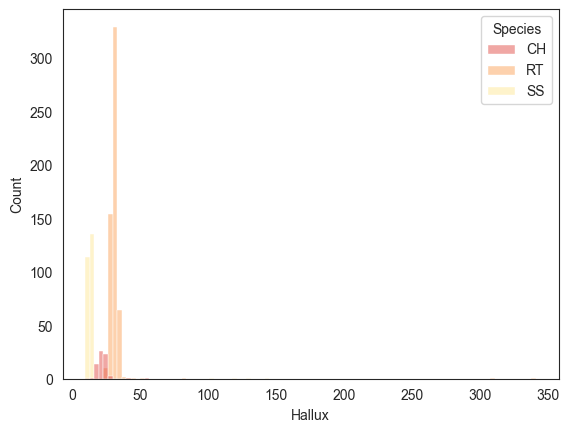

In [49]:
# Plot the distribution of hallux 
sns.histplot(data=hawks, x='Hallux', hue='Species')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


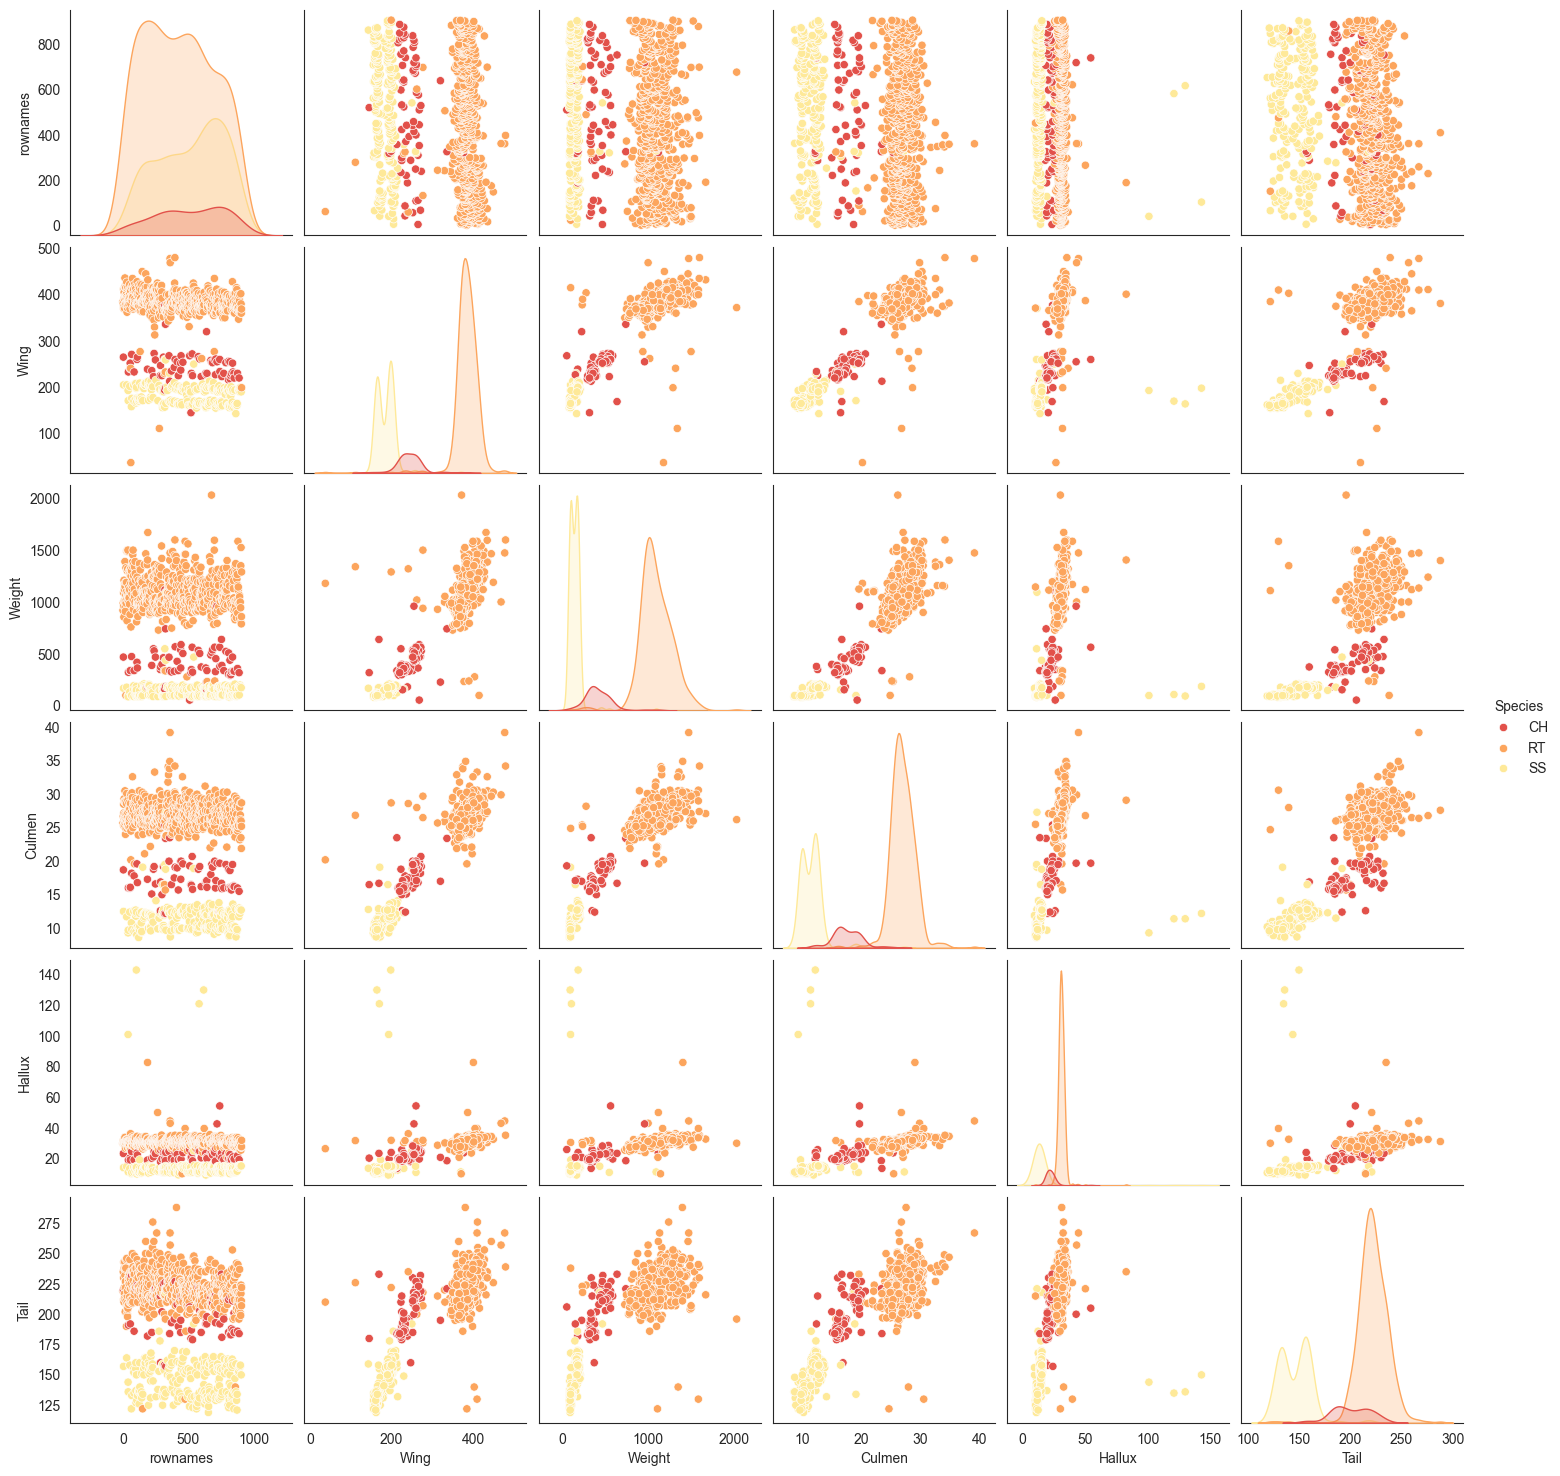

In [53]:
#removing the values of the hallux that are greater than 300
hawks = hawks.loc[hawks['Hallux'] <= 300]

#new pairplot
sns.pairplot(data=hawks, hue='Species')

Building a Model to predict the birds species

In [54]:
# I used everything but species to predict species
X = hawks.drop('Species', axis=1)
y = hawks['Species']

# Encode Age as a dummy variable.
X = pd.get_dummies(X, drop_first=True)

# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20240204
)

In [55]:
# Use a random forest model from scikit-learn
species_rf = RandomForestClassifier(
    max_depth=7,  
    n_estimators=10,
    random_state=20240204,
)
species_rf.fit(X_train, y_train)  # Fit the model on the training set

RandomForestClassifier(max_depth=7, n_estimators=10, random_state=20240204)

In [56]:
# Make predictions for the test set.
y_pred = species_rf.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)  
print("Accuracy:", accuracy)

Accuracy: 0.9812734082397003


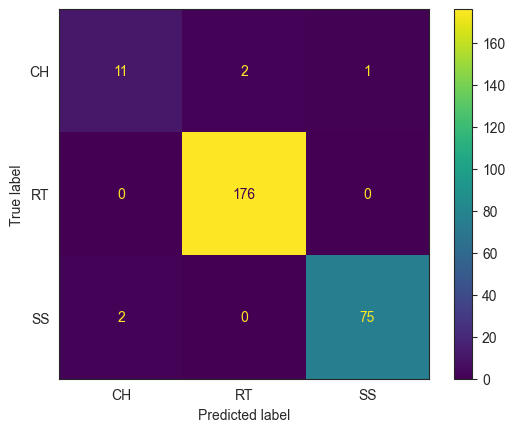

In [61]:
# Plot the confusion matrix to check how the model did
# using a function from scikit-learn's metrics subpackage.
# The number of correct classifications appear on the diagonal.
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)